### **NECESSARY IMPORTS**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
from keras.preprocessing import image
import os
import PIL
from PIL import Image
%matplotlib inline

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator, load_img, img_to_array

### **CONNECT DRIVE WITH GOOGLE COLAB**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **DEFINE BASE DIRECTORY FOR DATASET**

In [4]:
BASE = "/content/drive/MyDrive/Colab Notebooks/Fruits Classification"
path_to_directory = os.path.join(BASE, 'dataset')

In [5]:
#!unzip "/content/drive/MyDrive/Colab Notebooks/Fruits Classification/archive.zip" -d "/content/drive/MyDrive/Colab Notebooks/Fruits Classification/"

### **PLOT OF SOME TRAINING IMAGES**

In [6]:
fapple = os.path.join(BASE,"dataset","train","freshapples")

In [7]:
freshapples = os.listdir(fapple)
print(freshapples)

['rotated_by_45_Screen Shot 2018-06-08 at 5.13.18 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.21.31 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.15.28 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.13.10 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.15.39 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.03.59 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.10.43 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.04.24 PM.png', 'rotated_by_30_Screen Shot 2018-06-08 at 5.26.52 PM.png', 'rotated_by_30_Screen Shot 2018-06-08 at 5.28.48 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.23.23 PM.png', 'rotated_by_60_Screen Shot 2018-06-08 at 5.15.39 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.26.24 PM.png', 'rotated_by_60_Screen Shot 2018-06-08 at 5.17.34 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.34.07 PM.png', 'rotated_by_60_Screen Shot 2018-06-08 at 5.17.04 PM.png', 'rotated_by_60_Screen Shot 2018-06-08 at 5.13.25 PM.png', 'rotated_by_6

PNG
(342, 322)
RGB


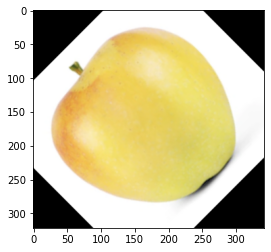

PNG
(346, 334)
RGB


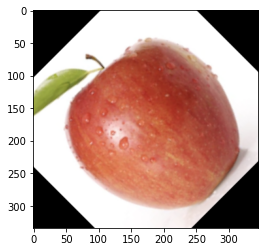

PNG
(384, 438)
RGB


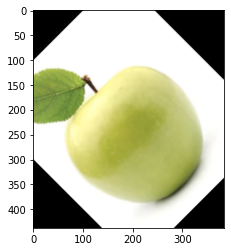

PNG
(334, 324)
RGB


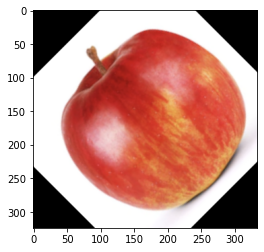

PNG
(378, 350)
RGB


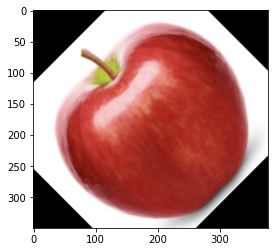

In [8]:
for i in range(0,5):
  im = os.path.join(fapple,freshapples[i])
  image = Image.open(im)
  # summarize some details about the image
  print(image.format)
  print(image.size)
  print(image.mode)
  # show the image

  # display the array of pixels as an image
  plt.imshow(image)
  plt.show()

### **IMAGE TRAINING AND VALIDATION DATA PREPROCESSING**

In [9]:
TRAINING_DIR = os.path.join(BASE, "dataset", "train")
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = os.path.join(BASE, "dataset", "test")
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(228,228),
	class_mode='categorical',
  batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(228,228),
	class_mode='categorical',
  batch_size=64
)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [10]:
class_labels = train_generator.class_indices
train_labels = train_generator.classes
validation_labels = validation_generator.classes

print(class_labels)
print(len(train_labels))
print(train_labels[0:5])
print(len(validation_labels))
print(validation_labels[0:5])

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
10901
[0 0 0 0 0]
2698
[0 0 0 0 0]


### **CONVOLUTIONAL NEURAL NETWORK DECLARATION**

In [11]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(228, 228, 3)))
model.add(MaxPooling2D(2, 2))
# The second convolution
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# The third convolution
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# The fourth convolution
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# Flatten the results to feed into a DNN
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation="relu"))
model.add(Dense(6, activation='softmax'))

In [ ]:
# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(6, activation='softmax')
# ])


In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>=0.8):
#       print("\nReached 90% accuracy so cancelling training!")
#       self.model.stop_training = True

# callbacks = myCallback()

### **CALLBACKS DECLARATION TO SAVE THE BEST WEIGHTS**

In [12]:
checkpoint_filepath = os.path.join(BASE, "model_checkpoint")
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               save_weights_only=True,
                                                               monitor='val_accuracy',
                                                               mode='max',
                                                               save_best_only=True)

### **LEARNING RATE SCHEDULAR DECLARATION TO FIND THE BEST LEARNING RATE FOR MODEL**

In [13]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer1 = keras.optimizers.SGD(learning_rate=lr_schedule)

In [28]:
# keras' ReduceLROnPlateau callback default parameters:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10,
                              verbose=0, mode='auto', min_delta=0.0001,
                              cooldown=0, min_lr=0)

In [31]:
optimizer2 = keras.optimizers.Adam()

### **SUMMARY OF THE MODEL**

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 226, 226, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 111, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 512)       1

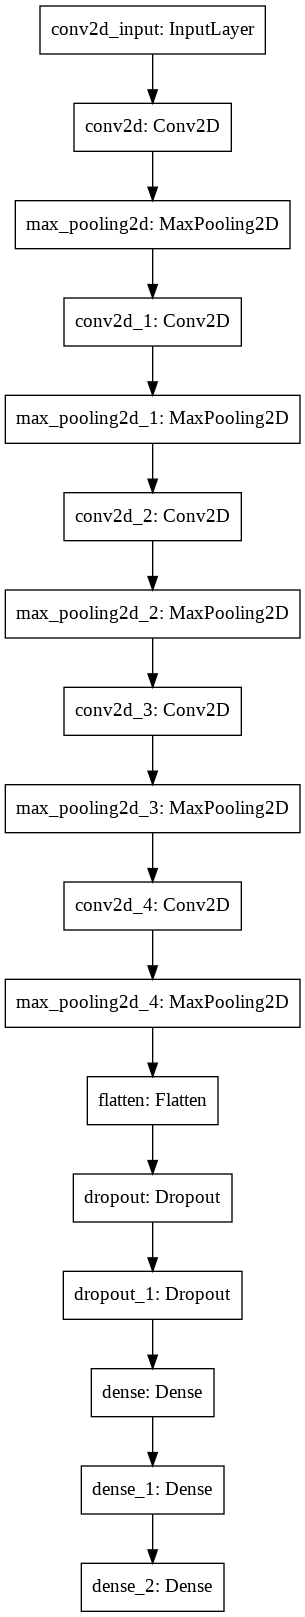

In [17]:
from tensorflow.keras.utils import Sequence, to_categorical, plot_model
plot_model(model)

### **IMPLEMENTATION OF THE MODEL**

In [32]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer2, metrics=['accuracy'])
history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1, validation_steps = 3, callbacks = [model_checkpoint_callback, reduce_lr])

Epoch 1/25
171/171 [==============================] - 3312s 19s/step - loss: 1.5471 - accuracy: 0.3383 - val_loss: 0.5442 - val_accuracy: 0.8281
Epoch 2/25
171/171 [==============================] - 233s 1s/step - loss: 0.5450 - accuracy: 0.8069 - val_loss: 0.3171 - val_accuracy: 0.9167
Epoch 3/25
171/171 [==============================] - 223s 1s/step - loss: 0.3947 - accuracy: 0.8602 - val_loss: 0.3741 - val_accuracy: 0.8594
Epoch 4/25
171/171 [==============================] - 220s 1s/step - loss: 0.3732 - accuracy: 0.8703 - val_loss: 0.2282 - val_accuracy: 0.9062
Epoch 5/25
171/171 [==============================] - 217s 1s/step - loss: 0.3123 - accuracy: 0.8868 - val_loss: 0.1643 - val_accuracy: 0.9167
Epoch 6/25
171/171 [==============================] - 215s 1s/step - loss: 0.2736 - accuracy: 0.8979 - val_loss: 0.2082 - val_accuracy: 0.9271
Epoch 7/25
171/171 [==============================] - 206s 1s/step - loss: 0.2564 - accuracy: 0.9085 - val_loss: 0.1860 - val_accuracy: 0.91

### **PLOT OF VALIDATION ACCURACY AND TRAINING ACCURACY, & VALIDATION LOSS AND TRAINING LOSS**

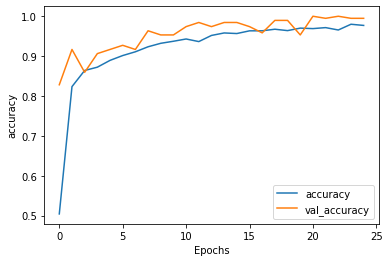

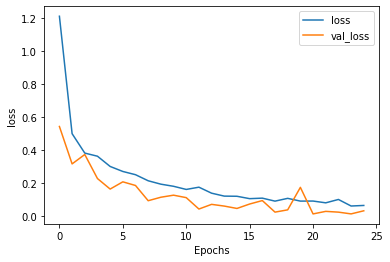

In [69]:
def plot_graphs(history, string, figname):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.savefig(os.path.join(BASE, figname))
  plt.show()
  

plot_graphs(history, 'accuracy', 'accuracy.png')
plot_graphs(history, 'loss', 'loss.png')

In [ ]:
#model.load_weights(checkpoint_filepath)

### **SAVE THE BEST MODEL & WEIGHTS**

In [34]:
model.save(os.path.join(BASE,"baseline_model.h5"))
model.save_weights(os.path.join(BASE,"model_weights.h5"))

### **PREDICTION ON RANDOM SET OF IMAGES**

In [48]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = keras.preprocessing.image.load_img(path, target_size=(228,228,3))
  x = keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(fn)
  print(classes)

Saving 92882610-rotten-orange-fruit-on-white-background.jpg to 92882610-rotten-orange-fruit-on-white-background (1).jpg
92882610-rotten-orange-fruit-on-white-background.jpg
[[0. 0. 1. 0. 0. 0.]]


In [70]:
print(class_labels)

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}


/content/drive/MyDrive/Colab Notebooks/Fruits Classification/fn test/many oranges.jpg
JPEG
(500, 500)
RGB


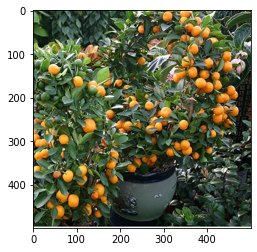

Overall prediction: 
[[0. 0. 1. 0. 0. 0.]]
Class name: freshoranges
[0. 0. 1. 0. 0. 0.]
/content/drive/MyDrive/Colab Notebooks/Fruits Classification/fn test/sayam.jpg
JPEG
(357, 832)
RGB


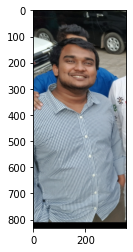

Overall prediction: 
[[0. 1. 0. 0. 0. 0.]]
Class name: freshbanana
[0. 1. 0. 0. 0. 0.]
/content/drive/MyDrive/Colab Notebooks/Fruits Classification/fn test/fresh-banana1.jpg
JPEG
(636, 636)
RGB


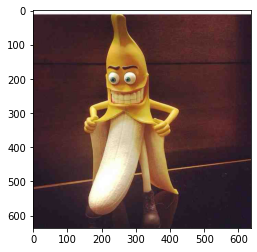

Overall prediction: 
[[0. 0. 0. 0. 1. 0.]]
Class name: rottenbanana
[0. 0. 0. 0. 1. 0.]
/content/drive/MyDrive/Colab Notebooks/Fruits Classification/fn test/fresh-rotten-banana.jpg
JPEG
(1300, 956)
RGB


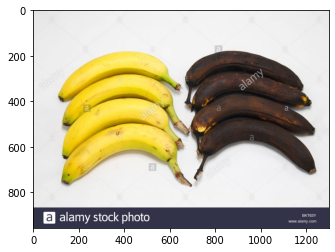

Overall prediction: 
[[0. 1. 0. 0. 0. 0.]]
Class name: freshbanana
[0. 1. 0. 0. 0. 0.]
/content/drive/MyDrive/Colab Notebooks/Fruits Classification/fn test/rotten-orange1.jpg
JPEG
(1300, 910)
RGB


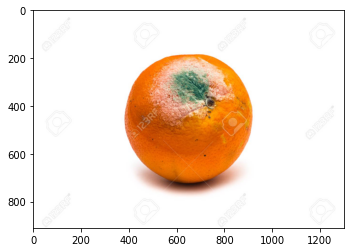

Overall prediction: 
[[0. 0. 1. 0. 0. 0.]]
Class name: freshoranges
[0. 0. 1. 0. 0. 0.]
/content/drive/MyDrive/Colab Notebooks/Fruits Classification/fn test/rotten-orange2.jpg
JPEG
(391, 280)
RGB


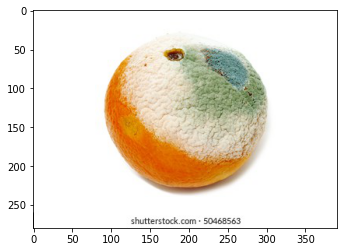

Overall prediction: 
[[0. 1. 0. 0. 0. 0.]]
Class name: freshbanana
[0. 1. 0. 0. 0. 0.]
/content/drive/MyDrive/Colab Notebooks/Fruits Classification/fn test/fresh-apple.jpg
JPEG
(500, 500)
RGB


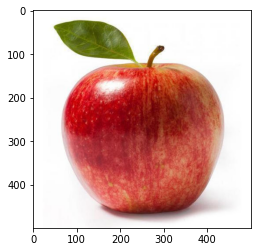

Overall prediction: 
[[1. 0. 0. 0. 0. 0.]]
Class name: freshapples
[1. 0. 0. 0. 0. 0.]
/content/drive/MyDrive/Colab Notebooks/Fruits Classification/fn test/rotten-banana1.jpg
JPEG
(584, 438)
RGB


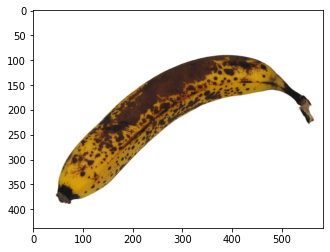

Overall prediction: 
[[0. 0. 0. 0. 1. 0.]]
Class name: rottenbanana
[0. 0. 0. 0. 1. 0.]


In [63]:
test_dir = os.path.join(BASE, 'fn test')
for i, data in enumerate(os.listdir(test_dir)):
  path = os.path.join(test_dir, data)
  print(path)
  image = Image.open(path)
  # summarize some details about the image
  print(image.format)
  print(image.size)
  print(image.mode)
  # show the image

  # display the array of pixels as an image
  plt.imshow(image)
  plt.show()
  img = keras.preprocessing.image.load_img(path, target_size=(228,228,3))
  x = keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  pred = model.predict(x)
  print("Overall prediction: ")
  print(pred)
  maxidx = np.argmax(max(pred))
  for k in class_labels.items():
    #print(k[0])
    if k[1]==maxidx:
      print("Class name:", k[0])
      break
  print(max(pred))

### **CHECK WHICH GPU IS AVAILABLE IN COLAB ENVIRONMENT**

In [1]:
!nvidia-smi

Tue Apr 13 08:54:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
!jupyter nbconvert --to script Fruits_Fresh_VS_Rotten_Classification.ipynb

[NbConvertApp] Converting notebook Fruits_Fresh_VS_Rotten_Classification.ipynb to script
[NbConvertApp] Writing 7212 bytes to Fruits_Fresh_VS_Rotten_Classification.txt
